In [1]:
import LCMGP
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import GPy
import numpy as np
from matplotlib import pyplot as plt

 /home/sudhanshu/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.


In [5]:
import LCMGP
from DataGenerator import DataGenerator
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import GPy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

 /m/home/home8/81/nautiys1/unix/jupyter/venv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.


## Steps:
IN this experiment we test the effect of reducing inducing points on classification accuracy and other scores
- Data used is artificially generated data set 
- It has both upward slope as well as increasing trend, however here we are testing only on it's capability to learn increasing trend
- Since clustering can be spurious we try to control for that by running each experiment 25 times and then report their averages and variances 

### testing Infra:

## Testing the effect of inducing points on classification accuracy

### 1. IN this data, C=1; P=3

In [ ]:
inds  = reversed([0.2,0.3,0.5,0.7,0.8])
accuracies = {}
f1Scores = {}
f1ScoresV = {}
accuraciesV = {}
TRreconstruction ={}
TTreconstruction ={}
TRreconstructionV ={}
TTreconstructionV ={}
faultyModel = {}
#Generae Data
dtgen = DataGenerator()
C=3
P=2
N=100
S=200
for ind in inds:
    f1=[]
    accu=[]
    recTr = []
    recTt = []
    print "\n---\n ind:",ind
    for times in range(25):
        print times,
        #generate data
        phi = np.random.normal(loc=0,scale=1,size=(C,P))
        Y,L,uBar = dtgen.generateData(phi,S=S,C=C,N=N)
        # create train test split
        Y_train, Y_test, L_train, L_test = train_test_split(Y, L, test_size=0.4, random_state=0)
        # fit the model
        lcgm = LCMGP.LCMGP()
        lcgm.fit(Y=Y_train,L=L_train,N=N,induction=ind,iterations=150)
        # predict for test
        predictions,Expresults, ux = lcgm.predict(Y_test)
        # calcualte reconstruction error for training
        predictionst,Expresultst, utx = lcgm.predict(Y_train)
        recTr.append(reconstructionError(YBar=Y_train,phiHatExpBar=lcgm.phiHatExpBar,uExpBar=utx))
        # calcualte reconstruction error for testing
        recTt.append(reconstructionError(YBar=Y_test,phiHatExpBar=lcgm.phiHatExpBar,uExpBar=ux))
        #print "Result:",np.unique(predictions,return_counts=True),np.unique(L_test,return_counts=True)
        f1s = metrics.f1_score(y_pred=predictions,y_true=L_test)
        f1.append(f1s)
        if f1s < 0.30:
            faultyModel[ind] = lcgm
        accu.append(metrics.accuracy_score(y_pred=predictions,y_true=L_test))
        
    #print f1,"\n",accu,f1,recTr
    f1Scores[ind] = np.mean(f1)
    accuracies[ind] = np.mean(accu)
    f1ScoresV[ind] = np.std(f1)
    accuraciesV[ind] = np.std(accu)
    TRreconstruction[ind] = np.mean(recTr)
    TTreconstruction[ind] =np.mean(recTt)
    TRreconstructionV[ind] = np.std(recTr)
    TTreconstructionV[ind] =np.std(recTt)
#plt.plot(induction,results)


---
 ind: 0.8
0 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
1 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
2 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
3 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
4 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
5 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
6 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
7 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
8 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
9 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
10 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
11 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
12 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
13 200 3 2 100
Model initialized with  0.8 induction ratio
150 updates
1

In [7]:
%matplotlib inline
import numpy as np
def reconstructionError(YBar,uExpBar,phiHatExpBar):
    totalError = 0
    for s in range(YBar.shape[0]):
        totalError += np.sum(np.abs(YBar[s] - uExpBar[s]*phiHatExpBar.T))
    return totalError/YBar.shape[0]

## F1 Scores with respect to inducing point ratio

(0.15, 0.85)

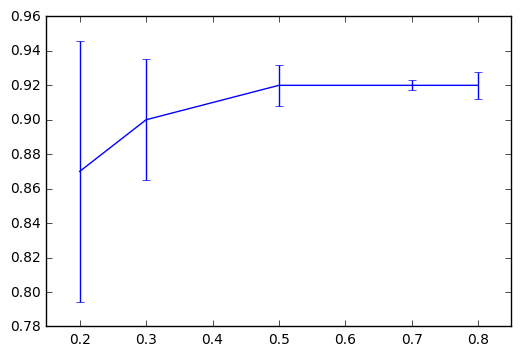

In [66]:
d=[]
for k,v in f1Scores.items():
    d.append((k,np.round(v,2),np.round(f1ScoresV[k],3)))
d = sorted(d, key=lambda x: x[0])  
d = pd.DataFrame(d,columns = ['ind','m','v'])
plt.errorbar(d['ind'],d['m'],d['v'])
plt.xlim(0.15,0.85)

## Accuracies with respect to inducing point ratio

(0.15, 0.85)

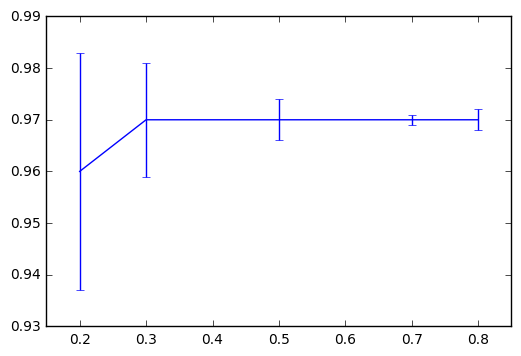

In [67]:
d=[]
for k,v in accuracies.items():
    d.append((k,np.round(v,2),np.round(accuraciesV[k],3)))
d = sorted(d, key=lambda x: x[0])  
d = pd.DataFrame(d,columns = ['ind','m','v'])
plt.errorbar(d['ind'],d['m'],d['v'])
plt.xlim(0.15,0.85)

## Reconstruction errors, test and training

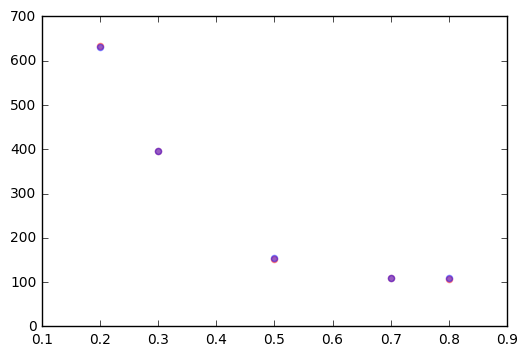

In [68]:
plt.scatter(TTreconstruction.keys(),TTreconstruction.values(),color='red',alpha=0.4)
plt.scatter(TRreconstruction.keys(),TRreconstruction.values(),color='blue',alpha=0.4)

Interesting thing is that even 50% of samples are enough to classify things properly.